In [ ]:
!cp /content/drive/"My Drive"/kaggle/moa/lish-moa.zip /content/
!unzip lish-moa.zip

In [2]:
!cp /content/drive/"My Drive"/kaggle/moa/blending.zip /content/
!unzip blending.zip

Archive:  blending.zip
   creating: blending/
   creating: blending/hold_preds/
  inflating: blending/hold_preds/model_1_hold_0.npy  
  inflating: blending/hold_preds/model_1_hold_1.npy  
  inflating: blending/hold_preds/model_1_hold_2.npy  
  inflating: blending/hold_preds/model_1_hold_3.npy  
  inflating: blending/hold_preds/model_1_hold_4.npy  
  inflating: blending/hold_preds/model_1_hold_5.npy  
  inflating: blending/hold_preds/model_1_hold_6.npy  
   creating: blending/subs/
  inflating: blending/subs/model_1_test_0.npy  
  inflating: blending/subs/model_1_test_1.npy  
  inflating: blending/subs/model_1_test_2.npy  
  inflating: blending/subs/model_1_test_3.npy  
  inflating: blending/subs/model_1_test_4.npy  
  inflating: blending/subs/model_1_test_5.npy  
  inflating: blending/subs/model_1_test_6.npy  
   creating: blending/hold_labels/
  inflating: blending/hold_labels/hold_labels_785.npy  
  inflating: blending/hold_labels/hold_labels_875.npy  


In [ ]:
!rm train_targets_folds.csv
!wget https://github.com/Mayukhdeb/moa-classification-with-model-blending/raw/main/folds/train_targets_folds.csv

In [4]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import numpy as np 
import pandas as pd 

from IPython.display import clear_output
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = 15, 7

CGREEN  = '\33[32m'
CBLUE =  '\033[34m'
CRED = '\033[1;31m'
CEND  = '\33[0m'

def seed_everything(seed=1903):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    print("seed kar diya")

In [5]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'
    
device


'cuda'

In [ ]:
!ls blending

In [8]:
hold_labels_filenames = ["blending/hold_labels/" + name for name in os.listdir("blending/hold_labels")]

hold_preds_filenames = np.sort(np.array(["blending/hold_preds/" + name for name in os.listdir("blending/hold_preds")]))

subs_filenames = np.sort(np.array(["blending/subs/" + name for name in os.listdir("blending/subs")]))

In [ ]:
hold_preds_filenames, subs_filenames

In [14]:
class blend():
    def __init__(self,all_preds_np):
        
        self.all_preds = all_preds_np
           
    def predict(self, weights):
        self.weights = weights
        final_pred = np.zeros_like(self.all_preds[0])
        
        for i in range(len(self.all_preds)):
            final_pred += self.all_preds[i] * self.weights[i]
            
        final_pred = final_pred/self.weights.sum()
        
        return final_pred

def log_loss_metric(y_true, y_pred):
    y_pred = y_pred.astype(np.float64)
    y_pred_clip = np.clip(y_pred, , 1 - )
    loss = - np.mean(np.mean(y_true * np.log(y_pred_clip) + (1 - y_true) * np.log(1 - y_pred_clip), axis = 1))
    return loss

In [ ]:

hold_preds_filenames, subs_filenames

In [12]:
hold_preds = [np.load(name) for name in hold_preds_filenames]
hold_labels = np.load(hold_labels_filenames[0])

In [ ]:
for p in hold_preds:
    print(log_loss_metric(hold_labels, p))

In [ ]:
!pip install optuna

In [19]:
import optuna  
optuna.logging.set_verbosity(1)

In [42]:
def find_loss(params):
    
    weights_np = np.array(list(params.values()))

    weights_np[weights_np < 0.1] = 0
    # print(weights_np)
    blend_boi = blend(hold_preds)
    sample_infer = blend_boi.predict(weights_np)
    
    
    loss = log_loss_metric(hold_labels, sample_infer)
    
    return loss


def objective(trial):

    params = {
        "w1": trial.suggest_uniform("w1", 0.0, 1.0),
        "w2": trial.suggest_uniform("w2", 0.0, 1.0),
        "w3": trial.suggest_uniform("w3", 0.0, 1.0),
        "w4": trial.suggest_uniform("w4", 0.0, 1.0),
        "w5": trial.suggest_uniform("w5", 0.0, 1.0),
        "w6": trial.suggest_uniform("w6", 0.0, 1.0),
        "w7": trial.suggest_uniform("w7", 0.0, 1.0),
        # "w8": trial.suggest_uniform("w8", 0.0, 1.0),
        # "w9": trial.suggest_uniform("w9", 0.0, 1.0),
        # "w10": trial.suggest_uniform("w10", 0.0, 1.0),
        # "w11": trial.suggest_uniform("w11", 0.0, 1.0),
        # "w12": trial.suggest_uniform("w12", 0.0, 1.0),
        # "w13": trial.suggest_uniform("w13", 0.0, 1.0),
        # "w14": trial.suggest_uniform("w14", 0.0, 1.0),
        # "w15": trial.suggest_uniform("w15", 0.0, 1.0),
        # "w16": trial.suggest_uniform("w16", 0.0, 1.0),
        # "w17": trial.suggest_uniform("w17", 0.0, 1.0),
        # "w18": trial.suggest_uniform("w18", 0.0, 1.0),
        # "w19": trial.suggest_uniform("w19", 0.0, 1.0),
        # "w20": trial.suggest_uniform("w20", 0.0, 1.0),
        # "w21": trial.suggest_uniform("w21", 0.0, 1.0),
        # "w22": trial.suggest_uniform("w22", 0.0, 1.0),
        # "w23": trial.suggest_uniform("w23", 0.0, 1.0),
        # "w24": trial.suggest_uniform("w24", 0.0, 1.0),
        # "w25": trial.suggest_uniform("w25", 0.0, 1.0),
        # "w26": trial.suggest_uniform("w26", 0.0, 1.0),
        # "w27": trial.suggest_uniform("w27", 0.0, 1.0),
        # "w28": trial.suggest_uniform("w28", 0.0, 1.0),
    

    }

    loss_ = find_loss(params) 
    return loss_

In [43]:
len(hold_preds)

7

In [44]:
study = optuna.create_study(direction="minimize")

[I 2020-10-12 15:06:45,439] A new study created in memory with name: no-name-25c918c8-4045-42d5-900a-9dcacbddaa27


In [ ]:
study.optimize(objective, n_trials=1000)

In [47]:
best_trial = study.best_params
best_trial

{'w1': 0.03385147568596504,
 'w2': 0.4603810910453131,
 'w3': 0.6336940186025386,
 'w4': 0.9811654433727185,
 'w5': 0.670980266901256,
 'w6': 0.8063997536588629,
 'w7': 0.3671495824818029}

In [48]:

blend_boi = blend(hold_preds)
noice_weights = np.array(list(best_trial.values()))
noice_weights[noice_weights < 0.1] = 0
sample_infer = blend_boi.predict(noice_weights)
loss = log_loss_metric(hold_labels, sample_infer)
print("loss on hold set: ", loss)  ## scalar only on model 1 was 0.014533262113321026

loss on hold set:  0.014852232543086617


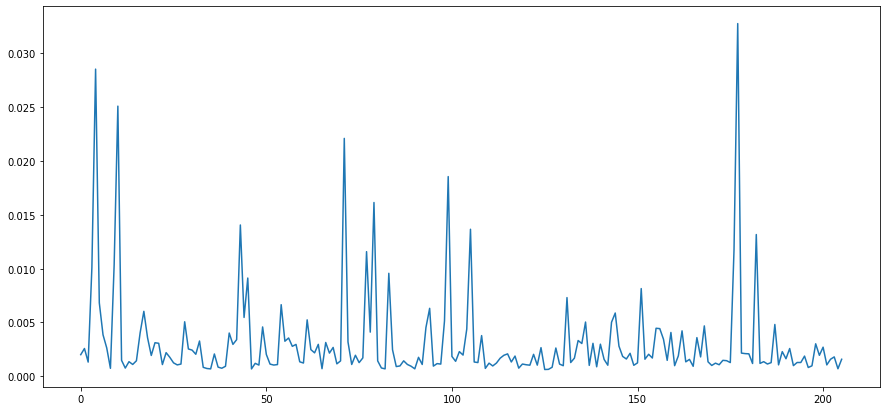

In [49]:
plt.plot(sample_infer[1])

In [50]:
subs = [np.load(n) for n in subs_filenames]

In [51]:
blend_final = blend(subs)
final_preds = blend_final.predict(noice_weights)

In [ ]:
final_preds[0]

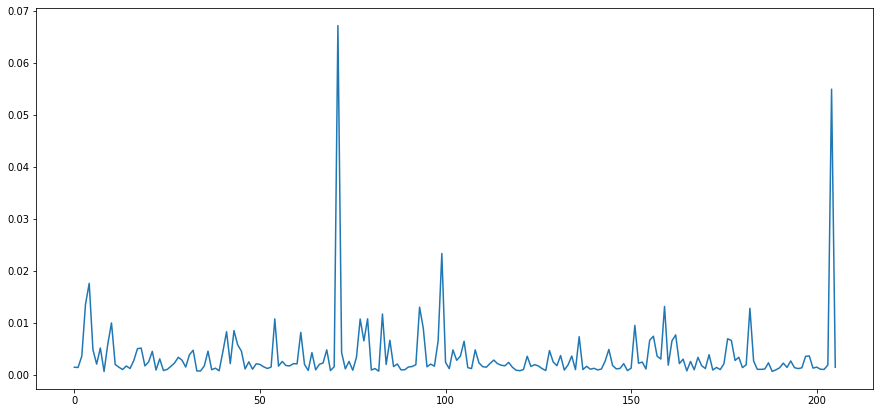

In [53]:
plt.plot(final_preds[0])

In [54]:
sample_submission_columns = pd.read_csv("sample_submission.csv").columns[1:]
sig_ids = pd.read_csv("sample_submission.csv")["sig_id"].values



pred_df = pd.DataFrame(final_preds, columns= sample_submission_columns)
pred_df["sig_id"] = sig_ids
columns_arrangement = ["sig_id"]
columns_arrangement.extend(pred_df.columns[:-1])
pred_df = pred_df[columns_arrangement]
save_name = "submission.csv"
print("saved: ", save_name)
pred_df.to_csv(save_name, index = False)


saved:  submission.csv


In [55]:
pred_df.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.001507,0.001466,0.003645,0.013627,0.017633,0.004892,0.002115,0.005215,0.000690,0.005938,0.010028,0.002047,0.001512,0.001072,0.001752,0.001263,0.002782,0.005076,0.005197,0.001777,0.002529,0.004566,0.000973,0.003116,0.000876,0.001083,0.001684,0.002335,0.003424,0.002864,0.001549,0.003904,0.004776,0.000791,0.000791,0.001761,0.004604,0.001032,0.001326,...,0.002616,0.001025,0.003413,0.001816,0.001257,0.003921,0.000974,0.001471,0.001052,0.002187,0.006984,0.006656,0.002812,0.003428,0.001438,0.001983,0.012841,0.002696,0.001105,0.001103,0.001161,0.002355,0.000720,0.001005,0.001408,0.002299,0.001475,0.002717,0.001433,0.001243,0.001406,0.003602,0.003681,0.001340,0.001532,0.001122,0.001093,0.001946,0.054969,0.001514
1,id_001897cda,0.000785,0.001300,0.002466,0.003183,0.003402,0.002273,0.004010,0.006518,0.003928,0.005862,0.006510,0.004331,0.001173,0.008116,0.001344,0.001433,0.001583,0.003097,0.003765,0.002366,0.004226,0.003942,0.000898,0.001338,0.000962,0.001832,0.001493,0.001070,0.001653,0.001481,0.001436,0.002753,0.001662,0.002543,0.000907,0.000870,0.003723,0.002735,0.003363,...,0.001476,0.001109,0.001075,0.000911,0.001384,0.006556,0.001745,0.005205,0.002437,0.002686,0.004146,0.002852,0.001031,0.001317,0.001468,0.002657,0.005227,0.001492,0.013194,0.001107,0.002707,0.002644,0.002950,0.001091,0.000817,0.001371,0.001740,0.002061,0.004074,0.001821,0.001505,0.001611,0.005087,0.001778,0.005093,0.001027,0.006251,0.001368,0.001698,0.003200
2,id_002429b5b,0.000266,0.000274,0.000351,0.000613,0.000898,0.000417,0.000410,0.000557,0.000206,0.000675,0.001353,0.000363,0.000265,0.000540,0.000246,0.000245,0.000390,0.000494,0.000448,0.000374,0.000296,0.000505,0.000251,0.000353,0.000274,0.000280,0.000291,0.000243,0.000456,0.000318,0.000315,0.000360,0.000286,0.000278,0.000219,0.000206,0.000673,0.000378,0.000474,...,0.000429,0.000346,0.000343,0.001041,0.000298,0.000279,0.000257,0.000301,0.000382,0.000247,0.001018,0.001642,0.000326,0.000309,0.000370,0.000372,0.000979,0.000250,0.000764,0.000277,0.000319,0.000494,0.000217,0.000280,0.000220,0.000388,0.000264,0.000273,0.000291,0.000303,0.000270,0.000342,0.000366,0.000565,0.000829,0.000213,0.000761,0.000305,0.000178,0.000329
3,id_0027

In [56]:
noice_weights

array([0.        , 0.46038109, 0.63369402, 0.98116544, 0.67098027,
       0.80639975, 0.36714958])